<a href="https://colab.research.google.com/github/ssanchezgoe/eafit_isa/blob/main/Nb_Google_Colab/S04_Bases_Estadisticas_Version_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <tr>
     <th><p><img alt="Colaboratory logo" height="80px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Sena_Colombia_logo.svg/1045px-Sena_Colombia_logo.svg.png" align="left" hspace="10px" vspace="0px"></p></th> 
    <th><p><img alt="Colaboratory logo" height="80px" src="https://www.isa.co/wp-content/uploads/2020/11/logo.png" align="right" hspace="10px" vspace="0px"></p></th>
    <th><p><img alt="Colaboratory logo" height="80px" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/EAFIT-2015.png" align="left" hspace="10px" vspace="0px"></p></th> 
     <th><h1>  Bases de Estadística Básica Aplicada </h1></th>
  </tr>








<p><a name="contents"></a></p>

# Contenido Sesión: Análisis exploratorio.

- <a href="#intro">1. Introducción</a><br>
- <a href="#eStat">2. Estadística descriptiva.</a><br>
    - <a href="#des_count">2.1. Métodos <code>.describe()</code> y <code>value_count()</code>.</a><br>
    - <a href="#bPlot">2.2. Box Plots.</a><br>
    - <a href="#sPlot">2.3. Scatter Plots.</a><br>
    - <a href="#hmaps">2.1. Groupby y Heatmaps.</a><br>
- <a href=#corr> 3. Correlación
- <a href="#anova2">4. ANOVA </a><br>
  - <a href="#single_anova">4.1. Introducción y ANOVA ONE Way</a><br> 
  - <a href="#oneway">4.2. One-way ANOVA Varios grupos (Opcional)</a><br>

<p><a name="intro"></a></p>

## Introducción:

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>
  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Determinar si una variables es un buen predictor de una variable blanco.</li>
  <li>Extraer las variables más importantes.</li>
  <li>Análisis de componentes principales (PCA).</li>
  <li>Análisis de componentes independientes (ICA).</li>
</ol>

**Objetivo:** Determinar las características que más impactan en lo que se busca establecer.

Para abordar el análisis exploratorio de datos, es útil aplicar las siguientes técnicas que abordaremos en el presente notebook:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento: Método GroupBy()</li>  
  <li> Correlación de Pearson</li>
  <li> Mapas de correlación</li>
  <li> Análisis de variaciones: Anova</li>
</ol>

En primer lugar, carguemos el dataset de caractarísticas de carros que vamos a analizar.

In [ ]:
import pandas as pd # Librería que tiene como objeto principal los dataframes
import numpy as np # Librería que tiene como objeto principal los arrays
import matplotlib.pyplot as plt

In [ ]:
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [ ]:
#Apariencia de la tabla de datos
df.head()

In [ ]:
df['engine-type'].replace({'dohc':np.nan})

In [ ]:
True+True+False

In [ ]:
df.isna().sum()

In [ ]:
df['horsepower-binned'].value_counts()

In [ ]:
df.groupby('horsepower-binned')['horsepower'].count()

Dropeo de los datos faltantes en el dataframe

In [ ]:
df.dropna().isnull().sum()

In [ ]:
df['num-of-doors']

In [ ]:
df.dtypes

In [ ]:
df['horsepower-binned'] = df['horsepower-binned'].astype('str')

In [ ]:
print(df['horsepower-binned'].dtype)

<p><a name="eStat"></a></p>

## Estadística descriptiva:

[[Contenidos]](#contents)

Antes de ponernos en la tarea de construir un modelo que pretenda predecir alguna característica del conjunto de datos, es importante realizar una exploración de los datos. La **estadística descriptiva** nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas. Para este fín, en Python, podemos hacer uso de:

<ol>
  <li>Métodos: <code>.describe()</code>, el cual permite obtener un resumen estadístico de las <b>variables numéricas</b> en <code>pandas</code>, o la función <code>.value_counts()</code>, la cual permite contabilizar variables categóricas .</li>
    <li>Box plots. </li>
    <li>Gráficos de dispersión. </li>
</ol>

<p><a name="des_count"></a></p>

### 2.1 Metodos .describe() y .value_counts()

In [ ]:
df.head()

In [ ]:
df.sample(5)

In [ ]:
# Para dar una descripción estadística de variables numéricas:
df.describe()

**Nota:** Si fuesemos a crear un modelo lineal con todas las variables, convendría normalizarlas. 

Por ejemplo, la variable "drive-wheels" describe la tracción de los vehiculos consignados en la tabla; son variables categóricas que representan:

<ol>
    <li>fwd - Front Wheel Drive: Tracción delantera.</li>
    <li>rwd - Rear Wheel Drive: Tracción Tracera.</li>
    <li>4wd - 4 Wheel Drive: Tracción de cuatro ruedas.</li>
</ol>

Para contabilizar esta variable usamos el método <code>.value_counts()</code>

In [ ]:
# Para contabilizar variables categóricas:
df["drive-wheels"].value_counts()

In [ ]:
df["drive-wheels"].value_counts().plot(kind = "pie", autopct='%1.2f%%')
plt.show()

In [ ]:
df["num-of-doors"].value_counts().plot(kind = "pie", autopct='%1.2f%%')
plt.show()

In [ ]:
df["engine-location"].value_counts().plot(kind = "pie", autopct='%1.2f%%')
plt.show()

<b>Ejercicio</b>: Guarde el número de cuentas por tipo de tracción en un nuevo DataFrame, renombre la columna a "value_counts" y establezca el nombre de los índices como "drive-wheels".

De doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
#Definición del dataFrame
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
# Renombramiento de la columna a value_counts
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
#Renimbramiento de los índices
drive_wheels_counts.index.name='drive_wheels'
#Visualización del dataFrame:
drive_wheels_counts
--->

In [ ]:
#Definición del dataFrame
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts

In [ ]:
drive_wheels_counts[['drive-wheels']]

In [ ]:
drive_wheels_counts.index.name

In [ ]:
# Renombramiento de la columna a value_counts
drive_wheels_counts = drive_wheels_counts.rename(columns={'drive-wheels':'cuentas'})
#Renimbramiento de los índices
drive_wheels_counts.index.name='tracción'
#Visualización del dataFrame:
drive_wheels_counts

In [ ]:
drive_wheels_counts.cuentas

No obstante, esta función también permite contabilizar las variables numéricas. Por ejemplo, "width" representa el ancho de los carros:

In [ ]:
df["width"].value_counts()

In [ ]:
df.describe(include='all')

<p><a name="bPlot"></a></p>

### 2.2 Box Plots

[Contenidos](#contents) 

Los box plot representan gráficas en las que se pueden analizar varias características de un conjunto de datos como:

<ol>
    <li> La distribución de los datos.</li>
    <li> Asimetría.</li>
    <li> Los puntos aislados.</li>
</ol>

En la siguiente gráfica se muestran las diferentes partes de una gráfica de caja:

<img src="https://imgbb.com/"><img src="https://i.ibb.co/6tkRtg0/Captura-de-pantalla-2019-08-22-19-01-17.png" style="width:250px;height:300px;" alt="Captura-de-pantalla-2019-08-20-22-39-39" border="0"></a>

En esta gráfica, podemos identificar las siguiente cantidades:

<ol>
    <li> Mediana.</li><br>
    <li> Cuartil superior $P_{75}.$</li><br>
    <li> Cuartil inferior $P_{25}$</li><br>
    <li>Rango intercuartil $IQR=P_{75}-P_{25}$</li><br>
    <li>Extremo superior \[UE= \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}\]<br> </li><br>
    <li>Extremo inferior \[LE= \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}\]<br></li>
</ol>

Usaremos `seaborn` para realizar graficas de dataframes.

Seaborn is a Python data visualization library based on matplotlib.

**Nota:** Sea born presenta una alta compatibilidad con los dataframes.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(4.5, 4.5))
sns.boxplot(x="drive-wheels",y="price", data=df)

En este caso se tiene que:

<ol>
    <li> Mediana: rwd $\rightarrow$ 16900, fwd $\rightarrow$ 8192 y 4wd$\rightarrow$9005.5</li><br>
    <li> Cuartil superior: $P_{75\text{-rwd}}\approx 22547.50$, $P_{75\text{-fwd}}\approx 10333$ y $P_{75\text{-4wd}}\approx 11368$</li><br>
    <li> Cuartil inferior: $P_{25\text{-rwd}}= 13455$, $P_{25\text{-fwd}}\approx 6951$ y $P_{25\text{-4wd}}\approx 7984$</li><br>
    <li>Rango intercuartil: $IQR_{\text{rwd}}\approx 9023$, $IQR_{\text{fwd}}\approx 3381$ y $IQR_{\text{4wd}}\approx 3384$</li><br>
    <li>Extremo superior \[UE= \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}\]<br>
        Por ejemplo, $UE_{\text{rwd}}= P_{\text{75}\text{rwd}}+1.5\times IQR_{\text{rwd}}\rightarrow UE_{\text{rwd}}=22547.50+(22547.50-13455.00)\times1.5 \therefore UE_{\text{rwd}}=36186.25$, ya que $UE_{\text{rwd}}<\text{max(Data)}$. </li><br>
    <li>Extremo inferior \[LE= \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}\]<br>
    Por ejemplo, $LE_{\text{rwd}}=\text{min(Data)}\rightarrow LE_{\text{rwd}}=6785$, ya que se cumple que $LO\leq \text{min(Data)}$. </li><br>
</ol>

In [ ]:
df.groupby(["drive-wheels"]).price.describe()

Los box plots, o diagramas de cajas permiten comparar facilmente diferentes grupos. En este ejemplo, mediante el uso de diagramas de cajas podemos ver diferentes categorías y sus distribuciones respecto al precio. 

Vemos que, por ejemplo, que el precio de los carros de tracción trasera (rwd) son distintos a los de otras categorias, no obstante, el precio de los carros de tracción delantera y $4\times4$ son casi indistinguibles.

**Ejercicio:** Use un diagrama de cajas para determinar si la variable "body-style" y "engine-location", la cual determina el tipo de carro, es un buen predictor del precio. Argumente su respuesta.

De click **aquí** para ver la respuesta.

<!--- Respuesta:
#Celda 1:
sns.boxplot(x="body-style", y="price", data=df)
# Argumentación: Se puede observar que el precio de los carros para los diferentes tipos de carros presenta una superposición significativa, de tal forma que la variable "body-style" no sería un predictor adecuado del precio
#Celda 2:
sns.boxplot(x="engine-location", y="price", data=df)
# Argumentación: Puede observarse qu la distribución de los precios entre las subcategorias fron y rear son lo suficiente diferentes como para considerar la variable categórica "engine-location" como un predictor adecuado del precio.
--->

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)
plt.show()

In [ ]:
df.groupby("body-style").price.describe()

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

In [ ]:
df.groupby("engine-location").price.describe()

In [ ]:
df["engine-location"].value_counts()

**Dataset de flores IRIS**

Se tienen 4 característica y tres categorías

In [ ]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
sns.set(style="ticks", color_codes=True)
iris=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

In [ ]:
#iris.drop('Id',axis=1,inplace=True)
#print(iris.head())
#sns.pairplot(iris)
sns.pairplot(iris, hue="species", palette="husl", markers=["o", "s", "D"])
plt.show()

<p><a name="sPlot"></a></p>

### 2.3 Scatter plots

[Contenidos](#contents) 

Dentro de nuestros datos podemos tener en varias ocaciones variables continuas. Este tipo de datos representan puntos dentro de un rango. En el conjunto de datos que estamos trabajando, por ejemplo, las variables correspondientes a las columnas **"price"** y **"engine-size"** son variables continuas. ¿Qué deberiamos hacer si queremos predecir el precio a partir del tamaño del motor?.

Una forma rápida para inspeccionar este tipo de relaciones consiste en realizar un scatter plot de ambas variables. Cada observación en el scatter plot es representada  como un punto. Este tipo de gráficas representa la relación ente ambas variables. La variable predictora representa la variable que se usa para predecir un determinado resultado. Por otra parte, la variable diana o blanco, corresponde a la variable que se pretende predecir. En nuestro caso tenemos que:

<ol>
    <li>Variable diana o blanco: "price".</li>
    <li>Variable predictora: "engine-size".</li>
</ol>

En una gráfica de dispersión, usualmente el eje x, o eje horizontal, se hace coincidir con la variable predictora y el eje y, o eje vertical, con la variable diana.

Veamos ahora como se relacionan las variables "price" y "engine-size".

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).columns

In [ ]:
df.plot(kind="scatter", y = "price", x = "engine-size", title = "Gráfica de dispersión de \"engine-size\" vs \"price\"", alpha = 0.4)
plt.show()

In [ ]:
df.plot(kind="scatter", y = "price", x = "curb-weight", title = "Gráfica de dispersión de \"engine-size\" vs \"price\"", alpha = 0.4)

In [ ]:
df.plot(kind="scatter", y = "price", x = "symboling", title = "Gráfica de dispersión de \"engine-size\" vs \"price\"", alpha = 0.4)

<p><a name="hmaps"></a></p>

### 2.4 Groupby y Heatmaps

[Contenidos](#contents)

Recordemos que con el método groupby podemos agrupar los datos en diferentes categorías. Los datos son agrupados con base en una o varias características y el análisis se realiza sobre los grupos individuales. Veamos esto.

In [ ]:
df.select_dtypes(include='object').columns

Agrupemos, por ejemplo la tabla por tipo de tracción ("drive-wheels"). Podemos observar que tenemos tres tipos de categorias.

In [ ]:
df['drive-wheels'].unique()

In [ ]:
df['body-style'].unique()

Definamos un subdataFrame con las columnas 'drive-wheels', 'body-style' y 'price' y agrupemos por 'drive-wheels' para calcular el valor medio en cada categoria:

In [ ]:
df_group = df[['drive-wheels','body-style','price']]

In [ ]:
# Agrupamiento de los resultados
df_grupo1 = df_group.groupby(['drive-wheels'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
df_grupo1

De los datos, se puede ver que los carros con tracción tracera son, en promedio, los mas caros. Por otra parte, los carros de tracción delantera y tracción total son, en promedio, similares. 

Podemos agrupar de acuerdo a varias variables. Por ejemplo, agrupemos por 'drive-wheels' y 'body-style'. Este procedimento agrupara el dataframe por combinaciones unicas de 'drive-wheels' y 'body-style'. Guardemos el resultado en la variable de prueba 'grupo_test'

In [ ]:
# grouping results
grupo_test = df_group.groupby(['drive-wheels','body-style'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
grupo_test

Este tipo de tablas es más facil visualizarlas cuando se convierten en una tabla pivote. Como en Excel, en las tablas pivote podemos visualizar los datos especificando una variable categórica a lo largo de las columnas y otra variable categórica a lo largo de las filas.

En este caso, la categoria "drive-wheel" le asignaremos las filas de la tabla, y realizacemos un pivote en "body-style" para convertirla en las columnas de la tabla:

In [ ]:
grouped_pivot = grupo_test.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

En muchas ocaciones, tenemos valores nulos para algunas celdas de la tabla. Podemos rellenar estos casos con un valor 0.

---



In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

El uso de heatmaps nos permite visualizar el comportamiento del precio en función de dos variables. Por ejemplo, pordemos visualizar la tabla pivote anterior como una imagen de píxeles con el color correspondiente al valor del precio. De esta forma, podemos ver, por ejemplo, como se relaciona el precio con el tipo de tracción y el tipo de carro:

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='jet')

#labels
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate the labels
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
sns.heatmap(grouped_pivot, cmap='jet')
plt.show()

**Ejercicio Guiado**

In [ ]:
df.select_dtypes(include='object').columns

In [ ]:
df['fuel-system'].value_counts()

In [ ]:
df['num-of-cylinders'].value_counts()

In [ ]:
df['make'].value_counts()

In [ ]:
df_group = df[['make','num-of-cylinders','price']]

# grouping results
grupo_test = df_group.groupby(['make','num-of-cylinders'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
grupo_test

#pivot table
grouped_pivot = grupo_test.pivot(index = 'make', columns = 'num-of-cylinders')
grouped_pivot = grouped_pivot.fillna(0)

grouped_pivot

In [ ]:
sns.heatmap(grouped_pivot, cmap='jet')
plt.show()

<p><a name="corr"></a></p>

## 3. Correlación

[Contenidos](#contents)

La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: Pearson, Spearman y Kendall. Cada uno tiene sus propias suposiciones sobre los datos que deben cumplirse para que la prueba pueda medir con precisión el nivel de correlación. Veamos cómo están distribuidas nuestras variables:

* Para la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* La correlación de Kendall es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación.

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una relación monotónica entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

In [ ]:
df.hist(figsize=(15,13))
plt.show()

En el caso de la correlación de Pearson, las suposiciones de normalidad de la distribución y homogeneidad de la varianza se pueden evaluar mediante las funciones `skewtest()` y `levene()`, respectivamente. Ambas pertenecientes al módulo `scipy.stats`. Evaluemos las suposiciones para las variables "price" y "engine-size"

In [ ]:
# test linearity
df.plot(kind="scatter", y = "price", x = "engine-size", alpha = 0.4)
plt.show()

In [ ]:
from scipy.stats import skewtest, levene

# test the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.
print(skewtest(df["price"]))
print(skewtest(df["engine-size"]))
print(skewtest(df["length"]))

print(skewtest(df["height"]))





In [ ]:
# test the null hypothesis that all input samples are from populations with equal variances
print(levene(df["price"],df["engine-size"]))

# A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.

Para calcular el coeficiente de correlación podemos utilizar el método `corr()` de Pandas

In [ ]:
corr_p = df.corr(method = "pearson")
corr_k = df.corr(method = "kendall")
corr_s = df.corr(method = "spearman")

corr_p

In [ ]:
corr_p[['engine-size','price']]

Veamos cómo se correlaciona el atributo precio con los demás atributos

In [ ]:
corr_p["price"].sort_values(ascending=False)

In [ ]:
corr_k["price"].sort_values(ascending=False)

Vemos que el precio del automóvil tiende a subir a medida que, por ejemplo, aumenta el tamaño del motor (engine-size), el ancho (width) y largo (length) del vehículo; no así de su altura (heigth) o del tipo de combustible que utiliza. El atributo más prometedor para predecir el precio del vehículo es el tamaño del motor (Pearson) y el peso del motor (kendall).

Otra forma de verificar la correlación entre los atributos es usar el método `scatter_matrix`, que dibuja cada atributo numérico contra cualquier otro atributo numérico. Como tenemos 29 columnas (se generarían $29^2=841$ gráficos), grafiquemos solo algunos de los atributos que tienen más correlación con el precio:

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
attributes = ["engine-size","curb-weight","horsepower","bore", "price"]

scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

La diagonal principal estaría llena de líneas rectas si Pandas dibujara cada variable contra sí misma, lo que no sería muy útil. En su lugar, Pandas muestra un histograma de cada atributo.

La librería `seaborn` nos permite realizar gráficos como el anterior o, por ejemplo, en un mapa de calor, mediante las funciones `pairplot()` y `heatmap()`, respectivamente.

In [ ]:
sns.pairplot(df, hue = "drive-wheels", vars = ["engine-size","curb-weight","horsepower","bore"])

In [ ]:
df_new = df[['engine-size','curb-weight','height','width','length','horsepower','peak-rpm','price','stroke','compression-ratio']]
corr_new = df_new.corr()

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap='jet',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Coclusión:** Es que es utilizada en parejas de varibles de la forma

$$(x_i, y)$$

Siendo $x_i$ una característica (o campo/columna) de la tabla de entrada e $y$ es la variable objetivo.

<p><a name="anova2"></a></p>

# 4. ANOVA.

<p><a name="single_anova"></a></p>

## 4.1. One-way ANOVA:

[[Contenidos]](#contents)

El el test one-way ANOVA es una técnica que es usada para variables blanco numéricas ("Y", siguendo la notación establecida), usualmente una variable, y datos de entrada de solo una variable numérica o categórica, por tal motivo se le conoce como "one-way".

El test de análisis de varianzas puede pensarse como una generalización del t-test a más de dos grupos. En ANOVA, la **hipotesis nula** establece que **las medias de las poblaciones de las cuales se tomaron las muestras de los grupos son iguales**. De forma más concisa tenemos que:

 $\mu_1=\cdots=\mu_n$
 

Para un grupo de $n$ datos. La hipótesis alternativa sería que alguna de las medias de la ecuación anterior no se cumpla. Por lo tanto, tener un F-value alto y un p-value pequeño, implica que la probabilidad de que la hipótesis nula sea cierta es baja, por tanto, decimos que la hipotesis alternativa se debe cumplir.

Supongamos que queremos analizar una variable categórica y ver la correlación con otras variables. 

Uno de los principales usos de ANOVA es el de analizar el impacto que las subcategorías tienen sobre en otra variable. 

Por ejemplo, en el caso del dataset de carros, resultaría interesante responder a la pregunta:

* ¿Qué subcategorias de la categoría make (Fabricantes de carros), tienen algun impacto sobre la variable precio?.

Empecemos por cargar los datos de carros y volverlos a inspeccionar:

Realicemos una gráfica del precio medio en función de la de la marca, con el fin de analizar si existe alguna dependencia.

In [125]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [126]:
df.sample(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
195,-1,74,volvo,turbo,four,wagon,rwd,front,104.3,0.907256,0.933333,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162.000000,5100.000000,17,22,18950.0,13.823529,High,0,1
116,1,119,plymouth,turbo,two,hatchback,fwd,front,93.7,0.755887,0.886111,50.8,2128,ohc,four,98,spdi,3.03,3.39,7.6,102.000000,5500.000000,24,30,7957.0,9.791667,Medium,0,1
126,0,122,renault,std,four,wagon,fwd,front,96.1,0.872177,0.923611,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,104.256158,5125.369458,23,31,9295.0,10.217391,Medium,0,1
99,0,108,nissan,std,four,wagon,fwd,front,100.4,0.887074,0.923611,56.1,3296,ohcv,six,181,mpfi,3.43,3.27,9.0,152.000000,5200.000000,17,22,14399.0,13.823529,Medium,0,1
172,-1,65,toyota,std,four,sedan,fwd,front,102.4,0.843825,0.923611,54.9,2414,ohc,four,122,mpfi,3.31,3.54,8.7,92.000000,4200.000000,27,32,10898.0,8.703704,Low,0,1


In [127]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

In [128]:
len(df)

201

In [130]:
df[["make","price"]].groupby("make").mean().sort_values(by="price")

,price
make,
chevrolet,6007.000000
dodge,7875.444444
plymouth,7963.428571
honda,8184.692308
subaru,8541.250000
isuzu,8916.500000
mitsubishi,9239.769231
renault,9595.000000
toyota,9885.812500


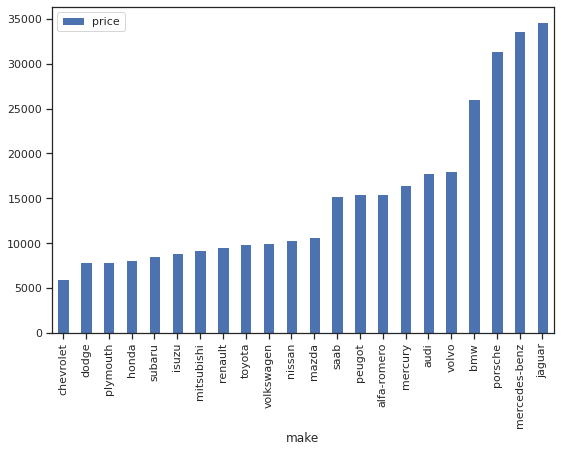

In [131]:
dftest1 = df[["make","price"]].groupby("make").mean().sort_values(by="price")
dftest1.plot(kind="bar",figsize=(9,6))
plt.show()

De este gráfica se puede observar que existe una  variación del precio medio a medida que nos movemos de izquierda a derecha en las diferentes marcas, no obstente, no sabemos cual marca de carro tienen el impacto más alto y cual menos en la predicción del precio. 

Mediante ANOVA podemos ver si existe una diferencia significativa entre las medias de los precios de dos o más marcas.

Recuerdemos que ANOVA retorna dos valores:

* F-value: Que representa la razón de la variación entre la media de los grupos y la variación dentro de cada grupo.

* p-value: Que representa la probabilidad de que la hipótesis nula (medias iguales) sea cierta. El valor p respresenta entonces, la significancia estadística.

Veamos en una grafica de boxplots como se relacionan las diferentes marcas segun el precio.

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

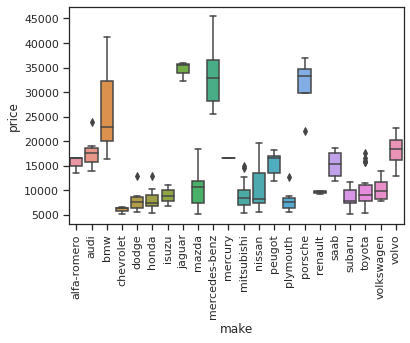

In [133]:
sns.boxplot(x="make", y="price", data=df[["make","price"]])
plt.xticks(rotation=90)
plt.show()

De esta gráfica resulta dificil establecer si existe una relacion entre la variable categórica "marca" y el precio.

Con el fin de comprender más a fondo la finalidad de ANOVA y lo que mide, intentemos diferenciar entre precios de carro según las marcas.

Iniciemos la comparación entre dos grupos de marcas, aunque la finalidad de ANOVA consiste en diferenciar más de dos grupos (para diferenciar solo dos grupos, la prueba más adecuada es la t-student).

De la base de datos de carros, extraigamos solo la marca y el precio y almacenémoslo en un nuevo dataFrame:

In [134]:
df_test = df[["make","price"]]

Creemos una función que nos sirva para escoger dos marcas dadas dentro de la columna de make y que la guarde con el respectivo precio en una nueva variable. Sea esta función escoger2marcas:

In [135]:
def escoger2marcas(df,marca1,marca2):
  locations = [bool(df.loc[i][0]==marca1)|bool(df.loc[i][0]==marca2) for i in range(len(df))]
  marca1_marca2 = df.loc[:][locations]
  
  return marca1_marca2

Establezcamos dos pares de marcas cuyo valor medio difieran notablemente y cuyo valor medio sean aproximados con el fin de ver los resultados de un test ANOVA:

* Medias diferentes honda vs volvo.
* Medias similares volkswagen vs nissan.

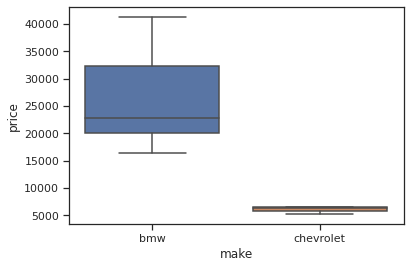

In [148]:
# Grupos de medias diferentes
honda_volvo = escoger2marcas(df_test,"chevrolet","bmw")
sns.boxplot(x="make", y="price", data=honda_volvo)
plt.show()

Si comparamos dos grupos muy diferentes obtenemos un F-value elevado y un p-value pequeño.

Apliquemos ANOVA con scipy.stats:

NOTA: la función que verán a continuación de `get_group()` obtienen el subgrupo que se le pase al argumento dentro de una lista, es decir, `test2.get_group('reanault')` devuelve una lista del dataframe solo con la subcategoria `renault`.

Agrupemos primero por fabricante el data frame:


In [149]:
df_test2 = df[['make', 'price']].groupby(['make'])
print(df_test2.get_group('chevrolet'))
print(df_test2.get_group('bmw'))

         make   price
17  chevrolet  5151.0
18  chevrolet  6295.0
19  chevrolet  6575.0
   make    price
9   bmw  16430.0
10  bmw  16925.0
11  bmw  20970.0
12  bmw  21105.0
13  bmw  24565.0
14  bmw  30760.0
15  bmw  41315.0
16  bmw  36880.0


In [145]:
df_test2.count().loc['volvo']

price    11
Name: volvo, dtype: int64

Realicemos el test ANOVA mediante la librería de scipy y el módulo de stats:

In [146]:
from scipy import stats

In [151]:
f_val, p_val = stats.f_oneway(df_test2.get_group('chevrolet')['price'], df_test2.get_group('bmw')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 13.196514939655819 , P = 0.005462599814656492


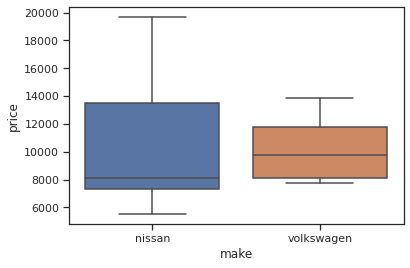

In [152]:
# Grupos de medias similares
honda_volvo = escoger2marcas(df_test,"volkswagen","nissan")
sns.boxplot(x="make", y="price", data=honda_volvo)

In [154]:
f_val, p_val = stats.f_oneway(df_test2.get_group('volkswagen')['price'], df_test2.get_group('volkswagen')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.0 , P = 1.0


Vemos que con ANOVA tenemos una "forma cuantitativa" de corroborar la inspección visual que se realiza con los boxplots.

Los resultados del test ANOVA para la comparación de este par de los grupos de marcas de carros es el siguiente:

honda vs volvo: El test ANOVA arroja un F-value alto y un p-value pequeño, lo que implica que deberíamos rechazar la hipótesis nula de que las medias de los grupos son aproximadamente iguales. En este sentido ambos grupos son diferentes y guardarian relacion con el precio.
volkswagen vs nissan: El test ANOVA arroja un F-value bajo y un p-value alto, lo que indica que debemos aceptar la hipótesis nula de que las medias son aproximadamente iguales y no guardarían correlación con el precio.

**Recapitulando**:

El test de análisis de varianzas (ANOVA - Analysis Of Variance) es un método estadístico usado para provar las diferencias entre dos o más grupos.

ANOVA se usa para el análisis de diferencias generales, en lugar de específicas, entre medias.

Mediante un test ANOVA, podemos averiguar si los resultados de un experimento o encuesta son significativos. En otras palabras, el test ANOVA nos permite rechazar o aceptar la hipótesis nula. Básicamente, lo que se hace es probar si existe una diferencia entre grupos. Algunos ejemplos en los que se puede aplicar este método son:

Un grupo de pacientes psiquiátricos está probando tres terapias diferentes: asesoramiento, medicación y biorretroalimentación, en el que se desea ver si una terapia es mejor que las otras.

Un fabricante que tiene dos procesos diferentes para hacer bombillas y quieren saber si un proceso es mejor que el otro.

Los estudiantes de diferentes universidades realizan el mismo examen y se desea ver si una universidad supera a la otra.

<p><a name="oneway"></a></p>

## 4.2. One-way ANOVA: Incluyendo varios grupos.

[[Contenidos]](#contents)

Apliquemos ahora un test ANOVA sobre todos los grupos conformados por las diferentes marcas para ver su relación con el precio.

Tengamos que ANOVA lo podemos aplicar de dos formas:

1.   Mediante el módulo `stats` de `scipy`
2.   Mediante el módulo `statmodels`, ajustando un modelo a los datos.

Ambos métodos son similares pero cuentan con implementaciones de fondo, ligeramente diferentes , por lo que los resultados obtenidos de los valores F-value y p-value son, también, ligeramente diferentes.



**ANOVA - mediante el módulo stats de scipy**:

Procedamos a ver todas las marcas de carros de nuestro dataset:

In [ ]:
df["make"].unique()

In [ ]:
from scipy import stats
f_val, p_val = stats.f_oneway(df_test2.get_group('alfa-romero')['price'],df_test2.get_group('audi')['price'],df_test2.get_group('bmw')['price'],df_test2.get_group('chevrolet')['price'],df_test2.get_group('dodge')['price'],df_test2.get_group('honda')['price'],df_test2.get_group('jaguar')['price'],df_test2.get_group('mazda')['price'],df_test2.get_group('mercedes-benz')['price'],df_test2.get_group('mercury')['price'],df_test2.get_group('mitsubishi')['price'],df_test2.get_group('nissan')['price'],df_test2.get_group('peugot')['price'],df_test2.get_group('plymouth')['price'],df_test2.get_group('porsche')['price'],df_test2.get_group('renault')['price'],df_test2.get_group('saab')['price'],df_test2.get_group('subaru')['price'],df_test2.get_group('toyota')['price'],df_test2.get_group('volkswagen')['price'],df_test2.get_group('volvo')['price'])  
   
print("ANOVA results: F=", f_val, ", P =", p_val)   

**ANOVA - mediante statsmodels:**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = ols('price ~ C(make)', data=df).fit()
results.summary()

In [ ]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

De los resultados del test ANOVA para todas las las marcas, podemos concluir que puede ser un buen predictor del precio, no obstante, no podemos concluir cuales marcas no aportan diferencias en relación al precio.

Para hallar los grupos que contribuyen más a diferenciar los precios y cuales menos, debemos hacer un test post-hoc.

**Test Post-hoc:**

No entraremos en detalle sobre la parte teórica de un test post-hoc, sino que nos centraremos los resultados que arroja la prueba.

Hay algunas técnicas diferentes que se pueden utilizar para establecer que grupos contribuyen o no a diferenciar el precio. Cada una de estas técnicas tiene diferentes formas de controlar el [tasa de error por familia](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/multiple-comparisons/what-are-individual-and-family-error-rates/). Los métodos principales que pueden encontrarse en python son:

* Fisher’s Least Significant Difference (LSD).
* Bonferroni correction.
* Tukey’s HSD.

Usemos el último de estos para hacer un test post-hoc.

In [ ]:
#Implementemos el método de Turkey's:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['price'], df['make'])
mc_results = mc.tukeyhsd()
print(mc_results)

El test post-hoc Turkey HDS contrala el error tipo I y mantienen el la tasa de error familiar en 0.05 (en la tabla se indica como FWER=0.05). Sobre la tabla anterior se tiene que: 
* Las columnas "grupo1" y grupo2 corresponden a los grupos que son comparados. 
* `meandiff` representa la diferencia en valores medios de los grupos calculados (group1-group2).
* Las columnas `lower` y `upper` corresponden a los límites inferior y superior del intervalo de confianza del 95%.
* En la columna `reject` se establece si debemos rechazar o no la hipotesis nula (medias iguales). 